In [20]:
import pandas as pd
import numpy as np

In [21]:
class Bayes_Classifier:
    def __init__(self, genero, idade, escolaridade, profissao, target):
        self.genero = genero
        self.idade = idade
        self.escolaridade = escolaridade
        self.profissao = profissao
        self.target = target
        self.carrega_tabela("naive-bayes-classificador-2.csv")

    def carrega_tabela(self, tabela):
        self.csv = pd.read_csv(tabela, sep=',')

    def calculate_prior(self, Y):
        tabela = self.csv
        classes = sorted(list(tabela[Y].unique()))
        prior = []
        for i in classes:
            prior.append(len(tabela[tabela[Y]==i])/len(tabela))
        return prior

    def calculate_likelihood_gaussian(self, feat_name, feat_val, Y, label):
        tabela = self.csv
        feat = list(tabela.columns)
        tabela = tabela[tabela[Y]==label]
        mean, std = tabela[feat_name].mean(), tabela[feat_name].std()
        p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
        return p_x_given_y

    def naive_bayes_gaussian(self, X, Y):
        tabela = self.csv
        # get feature names
        features = list(tabela.columns)[:-1]

        # calculate prior
        prior = self.calculate_prior(Y)

        Y_pred = []
        # loop over every data sample
        for x in X:
            # calculate likelihood
            labels = sorted(list(tabela[Y].unique()))
            likelihood = [1]*len(labels)
            for j in range(len(labels)):
                for i in range(len(features)):
                    likelihood[j] *= self.calculate_likelihood_gaussian(features[i], x[i], Y, labels[j])

            # calculate posterior probability (numerator only)
            post_prob = [1]*len(labels)
            for j in range(len(labels)):
                post_prob[j] = likelihood[j] * prior[j]

            Y_pred.append(np.argmax(post_prob))

        return np.array(Y_pred)

In [19]:
a = Bayes_Classifier("F","a - Ate 25 anos ","Fundamental","b",0)
print(a.csv.head())

  genero             idade escolaridade profissao  target
0      F  a - Ate 25 anos   Fundamental         b       0
1      M  a - Ate 25 anos         Medio         d       1
2      F  c - 36 a 45 anos  Fundamental         a       1
3      M  d - 46 a 55 anos  Fundamental         a       0
4      F  c - 36 a 45 anos  Fundamental         b       1


AxesSubplot(0.125,0.125;0.775x0.755)


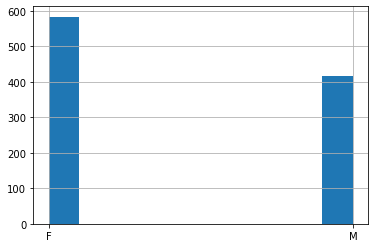

In [10]:
print(a.csv['genero'].hist())

AxesSubplot(0.125,0.125;0.775x0.755)


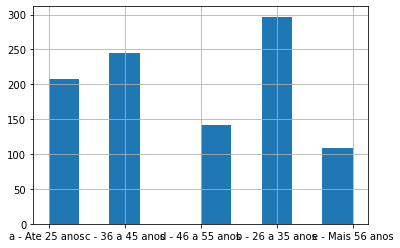

In [11]:
print(a.csv['idade'].hist())


AxesSubplot(0.125,0.125;0.775x0.755)


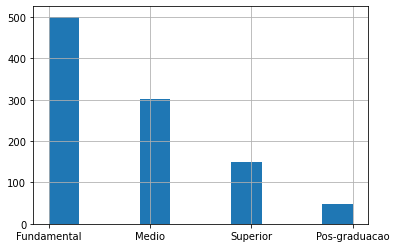

In [12]:
print(a.csv['escolaridade'].hist())


AxesSubplot(0.125,0.125;0.775x0.755)


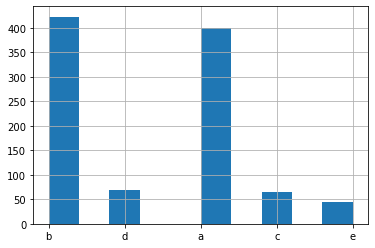

In [13]:
print(a.csv['profissao'].hist())


AxesSubplot(0.125,0.125;0.775x0.755)


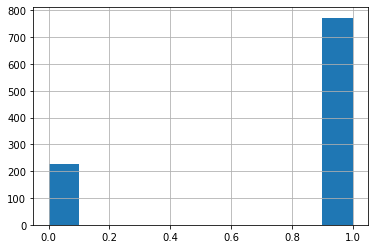

In [14]:
print(a.csv['target'].hist())